In [1]:
import os, sys
currentdir = os.path.dirname(os.path.realpath(os.path.abspath("")))
scriptsdir = os.path.dirname(currentdir)
if scriptsdir not in sys.path:
    sys.path.append(scriptsdir)

from customscripts import configuration
from customscripts import utils

# Common imports

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import plotly.express as px
import cufflinks as cf

import plotly.tools 
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import chart_studio 
import chart_studio.plotly as py
import chart_studio.tools as tls

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
username = 'idaShobs'
api_key = '0CbL0aflTUW9j24yYVgP'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [13]:
# get_dataset_df(weekNumber, datasetFileName)

week4_data = utils.get_dataset_df(4, "week4_final")
week3_data = utils.get_dataset_df(3, "all_categories")
week3_data['Product_Type'] = 'Food'
week4_data['Product_Type'] = week4_data['Category']
week3_data = week3_data[~(week3_data['Trade Flow'] != 'Import')]
gdp_data = utils.get_dataset_df(4, "GDP_per_capita")
population_data = utils.get_dataset_df(4, "population")

In [14]:
countries = week3_data["Reporter ISO"].unique().tolist()
population_data = population_data[population_data["Country Code"].isin(countries)]
population_data = population_data[population_data.columns[~(population_data.columns< "2007")]]
population_data = population_data.drop(columns={"2020", "Unnamed: 65"})

In [17]:
main_data = week4_data.append(week3_data, sort=False)

main_data.head()

Unnamed: 0  Unnamed: 0.1 Classification    Year  Trade Flow Code  \
0           0             0             H3  2007.0              1.0   
1           1             1             H3  2007.0              1.0   
2           2             2             H3  2007.0              1.0   
3           3             3             H3  2007.0              1.0   
4           4             4             H3  2007.0              1.0   

  Trade Flow  Reporter Code Reporter Reporter ISO  Partner Code  ... ii2009  \
0     Import          276.0  Germany          DEU           0.0  ...    NaN   
1     Import          276.0  Germany          DEU           0.0  ...    NaN   
2     Import          276.0  Germany          DEU           0.0  ...    NaN   
3     Import          276.0  Germany          DEU           0.0  ...    NaN   
4     Import          276.0  Germany          DEU           0.0  ...    NaN   

  ii2010  ii2011 ii2012  ii2013  ii2014 ii2015  ii2016 ii2017  ii2018  
0    NaN     NaN    NaN     NaN     NaN    NaN     NaN    NaN     NaN  
1    NaN     NaN    NaN     NaN     NaN    NaN     NaN    NaN     NaN  
2    NaN     NaN    NaN     NaN     NaN    NaN     NaN    NaN     NaN  
3    NaN     NaN    NaN     NaN     NaN    NaN     NaN    NaN     NaN  
4    NaN     NaN    NaN     NaN     NaN    NaN     NaN    NaN     NaN  

[5 rows x 60 columns]

In [5]:
print(f"Sum of Null Values in each column \n{main_data.isnull().sum()}")
print(f"Columns in main data \n{main_data.columns}")
print(f"Categories in main data \n {main_data.Category.unique()}")
print(f"Commodities in main data \n {main_data.Commodity.unique()}")
print(f"Trade Flows in main data \n {main_data['Trade Flow'].unique()}")

Sum of Null Values in each column 
Unnamed: 0                                      0
Unnamed: 0.1                                    0
Classification                                  0
Year                                            2
Trade Flow Code                                 2
Trade Flow                                      2
Reporter Code                                   2
Reporter                                        2
Reporter ISO                                    2
Partner Code                                    2
Partner                                         2
Partner ISO                                 19551
Commodity Code                                  2
Commodity                                       2
Trade Value (US$)                               2
Category Code                                   0
Category                                        0
Development Category                            0
Development Level                               0
Population in 2

In [18]:
main_data = main_data.drop(columns = ['Classification', 'Partner Code', 'Reporter Code', 'Commodity Code', 'Category Code', 'Qty Unit Code','Qty Unit', 'Qty', 'Netweight (kg)', 'Trade Flow Code', 'Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'ii2005', 'ii2006', 'ii2007','ii2008', 'ii2009', 'ii2010', 'ii2011', 'ii2012', 'ii2013', 'ii2014','ii2015', 'ii2016', 'ii2017', 'ii2018','% Malnutritioned Childern < 5 years old', 'Total Imports in $','Income Index Rank', ])
print(f"Columns in main data frame after dropping unneeded columns \n {main_data.columns}")

Columns in main data frame after dropping unneeded columns 
 Index(['Year', 'Trade Flow', 'Reporter', 'Reporter ISO', 'Partner',
       'Partner ISO', 'Commodity', 'Trade Value (US$)', 'Category',
       'Development Category', 'Development Level',
       'Population in 2005 (in million)', 'Population in 2010 (in million)',
       'Population in 2014 (in million)', 'Population in 2018 (in million)',
       'GDP Growth % in 2007', 'GDP Growth % in 2008', 'GDP Growth % in 2009',
       'GDP Growth % in 2010', 'GDP Growth % in 2011', 'GDP Growth % in 2012',
       'GDP Growth % in 2013', 'GDP Growth % in 2014', 'GDP Growth % in 2015',
       'GDP Growth % in 2016', 'GDP Growth % in 2017', 'GDP Growth % in 2018',
       'GDP Growth % in 2019', 'Product_Type'],
      dtype='object')


In [19]:
for i in range(2007, 2020):
    col = f'GDP Growth % in '+str(i)
    main_data[col].fillna(main_data[col].iloc[0],inplace=True)

In [20]:
main_data = main_data[~main_data['Year'].isnull()]
main_data['Partner ISO'].fillna(main_data.Partner, inplace=True)
print(f"Sum of Null Values in each column \n{main_data.isnull().sum()}")

Sum of Null Values in each column 
Year                               0
Trade Flow                         0
Reporter                           0
Reporter ISO                       0
Partner                            0
Partner ISO                        0
Commodity                          0
Trade Value (US$)                  0
Category                           0
Development Category               0
Development Level                  0
Population in 2005 (in million)    0
Population in 2010 (in million)    0
Population in 2014 (in million)    0
Population in 2018 (in million)    0
GDP Growth % in 2007               0
GDP Growth % in 2008               0
GDP Growth % in 2009               0
GDP Growth % in 2010               0
GDP Growth % in 2011               0
GDP Growth % in 2012               0
GDP Growth % in 2013               0
GDP Growth % in 2014               0
GDP Growth % in 2015               0
GDP Growth % in 2016               0
GDP Growth % in 2017               0
GDP

In [21]:
def merge_columns_by_year(df, years, new_col_name, old_name_pre = '', old_name_sub=''  ):
    df[new_col_name] = 0.0
    for i, val in enumerate(years):
        col = old_name_pre + str(val)+ old_name_sub
        if(i == 0):
            df[new_col_name] = np.where((df['Year'] <=val), df[col], df[new_col_name])
        elif (i == (len(years) - 1)):
            prev = years[i-1]
            df[new_col_name] = np.where((df['Year'] > prev), df[col], df[new_col_name])
        else:
            prev = years[i-1]
            df[new_col_name] = np.where((df['Year'] > prev) & (df['Year'] <= val), df[col], df[new_col_name])
    return df

In [22]:

def merge_annual_data(df, data, years, new_col_name):
    df[new_col_name] = 0.0
    df['Year'] = df['Year'].astype('str') 
    for index,row in data.iterrows():
        country = row["Country Code"]
        for i, val in enumerate(years):
            val = str(val)
            if(i == 0):
                df[new_col_name] = np.where((df['Year'] <=val) & (df['Reporter ISO'] == country), row[val], df[new_col_name])
            elif (i == (len(years) - 1)):
                prev = years[i-1]
                prev= str(prev)
                df[new_col_name] = np.where((df['Year'] > prev) & (df['Reporter ISO'] == country), row[val], df[new_col_name])
            else:
                prev = years[i-1]
                prev= str(prev)
                df[new_col_name] = np.where((df['Year'] > prev) & (df['Year'] <= val) & (df['Reporter ISO'] == country), row[val], df[new_col_name])
    return df

In [23]:
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
gdpColumnName = 'Gdp_per_capita'
populationColumnName = "Population"
main_data = merge_annual_data(main_data.copy(), gdp_data, years, gdpColumnName)
main_data = merge_annual_data(main_data.copy(), population_data, years, populationColumnName)

In [24]:
main_data = main_data.drop(columns = ['Population in 2005 (in million)','Population in 2010 (in million)', 'Population in 2014 (in million)',
       'Population in 2018 (in million)',  f'GDP Growth % in 2007', f'GDP Growth % in 2008', f'GDP Growth % in 2009',
       f'GDP Growth % in 2010', f'GDP Growth % in 2011', f'GDP Growth % in 2012',
       f'GDP Growth % in 2013', f'GDP Growth % in 2014', f'GDP Growth % in 2015',
       f'GDP Growth % in 2016', f'GDP Growth % in 2017', f'GDP Growth % in 2018',
       f'GDP Growth % in 2019'])
print(f"Columns in main data frame after dropping unneeded columns \n {main_data.columns}")

Columns in main data frame after dropping unneeded columns 
 Index(['Year', 'Trade Flow', 'Reporter', 'Reporter ISO', 'Partner',
       'Partner ISO', 'Commodity', 'Trade Value (US$)', 'Category',
       'Development Category', 'Development Level', 'Product_Type',
       'Gdp_per_capita', 'Population'],
      dtype='object')


In [25]:
data_all_cats = main_data.copy()
data_all_cats=data_all_cats[~(data_all_cats.Year<"2007")]

In [26]:
data_all_cats['Year'] = data_all_cats['Year'].astype('float64')

In [27]:

data_all_cats['Year'] = pd.to_datetime(data_all_cats['Year'], format='%Y')
print(f"Data types of columns after transforming to right data type \n {data_all_cats.dtypes}")



Data types of columns after transforming to right data type 
 Year                    datetime64[ns]
Trade Flow                      object
Reporter                        object
Reporter ISO                    object
Partner                         object
Partner ISO                     object
Commodity                       object
Trade Value (US$)              float64
Category                        object
Development Category             int64
Development Level               object
Product_Type                    object
Gdp_per_capita                 float64
Population                     float64
dtype: object


In [28]:
cat_1 = data_all_cats[data_all_cats['Development Category']==1]['Reporter'].unique().tolist()
cat_2 = data_all_cats[data_all_cats['Development Category']==2]['Reporter'].unique().tolist()
cat_3 = data_all_cats[data_all_cats['Development Category']==3]['Reporter'].unique().tolist()
data_all_cats.sort_values(by=['Year', 'Reporter'], inplace=True)

In [32]:
norm_trade_col = 'Trade_value_per_population'
norm_gdp_col = 'log (GDP) p/c'
data_all_cats[norm_trade_col] = data_all_cats['Trade Value (US$)']/data_all_cats['Population']
data_all_cats[norm_gdp_col] = np.log(data_all_cats[gdpColumnName])

data_all_cats.head()

Year Trade Flow Reporter Reporter ISO Partner Partner ISO  \
175442 2007-01-01     Import   Brazil          BRA   World         WLD   
175443 2007-01-01     Import   Brazil          BRA   World         WLD   
175444 2007-01-01     Import   Brazil          BRA   World         WLD   
175445 2007-01-01     Import   Brazil          BRA   World         WLD   
175446 2007-01-01     Import   Brazil          BRA   World         WLD   

                                                Commodity  Trade Value (US$)  \
175442                                Inorganic chemicals       1.433041e+09   
175443                                  Organic chemicals       6.376564e+09   
175444                            Pharmaceutical products       3.508847e+09   
175445                                        Fertilizers       4.528587e+09   
175446  Essential oils and resinoids; perfumery, cosme...       4.032763e+08   

                      Category  Development Category Development Level  \
175442  Chemicals and Plastics                     2            Medium   
175443  Chemicals and Plastics                     2            Medium   
175444  Chemicals and Plastics                     2            Medium   
175445  Chemicals and Plastics                     2            Medium   
175446  Chemicals and Plastics                     2            Medium   

                  Product_Type  Gdp_per_capita   Population  \
175442  Chemicals and Plastics     8831.023117  192030362.0   
175443  Chemicals and Plastics     8831.023117  192030362.0   
175444  Chemicals and Plastics     8831.023117  192030362.0   
175445  Chemicals and Plastics     8831.023117  192030362.0   
175446  Chemicals and Plastics     8831.023117  192030362.0   

        Trade_value_per_population  log (GDP) p/c  
175442                    7.462577       9.086026  
175443                   33.206020       9.086026  
175444                   18.272353       9.086026  
175445                   23.582661       9.086026  
175446                    2.100066       9.086026

In [30]:
sns.set_theme()

In [31]:
data_all_cats["Reporter ISO"].unique()

array(['BRA', 'CHN', 'HKG', 'EGY', 'DEU', 'IND', 'JPN', 'MEX', 'NGA',
       'PAK', 'KOR', 'THA', 'TUR', 'USA', 'VNM'], dtype=object)

In [34]:
base = data_all_cats.copy()
base = base.groupby(['Year', 'Reporter', 'Trade Flow', 'Product_Type'])



# Analysis of trade values using different approaches

Approach B and C seem to be the best. Approach C specifically gives a direct overview and is very easy to understand

## Approach B: Trade Value per product type for each country
### High Income Countries
* Similar trade patterns
* Minerals makes up the highest trade values of their total imports while Base Metals
* USA has the highest trade value for import for each product type, while Germany follows. An exception is Minerals, Japan spend more importing Minerals than Germany
* Germany gained the most Exporting Base Metals and Chemicals and Plastics, while USA gained the most exporting minerals. 
### Middle Income Countries
* Similar trade patterns
* China spends values reaching Trillion for all importing all product types. Other countries are in the billion dollars range. An exception is the import of guns
* Thailand has the highes trade value importing guns while Brazil closely followed by Turkey exports the most guns
* Brazil closely followed by Mexico hit the Trillion Trade Value exporting Minerals and have the highest trade values for these product types. China is the highest earner and exports the most Base Metals and Chemicals and Plastic
### Low Income Countries
* India spends the most money importing the different product types. Their highest import is Minerals
* India followed by Egypt and PAkistan import the most guns. 
* Nigeria gains the most exporting Minerals, followed by India. 
* India has the highest tade value of exports in all other category

In [20]:
#fig = make_subplots(rows=3, cols=1)

def show_histogram(df, xname, yname, title, colorname):
    name_list = ['High', 'Middle', 'Low']
    for i in range(1, 4):
        level = name_list[i-1]
        import_data = base.filter(lambda x: ((x['Trade Flow'] == 'Import') & (x['Development Category']== i)).any())
        import_data.reset_index(drop=True, inplace=True)
        export_data = base.filter(lambda x: ((x['Trade Flow'] == 'Export') & (x['Development Category'] == i)).any())
        export_data.reset_index(drop=True, inplace=True)
        new = import_data.groupby(['Year', 'Reporter', 'Product_Type']).agg({norm_trade_col:"sum"}).reset_index()
        new_title = title + f' ({level} income) '
        ylabel = f'Import {yname}'
        fig = px.histogram(new, x="Product_Type", y=norm_trade_col, color="Reporter", title=new_title, color_discrete_sequence=px.colors.qualitative.G10, hover_data=new.columns, labels={norm_trade_col: ylabel, "Product_Type":xname})
        fig.show()
        #py.iplot(fig, filename = f'Sum_Import_{level}')
        new = export_data.groupby(['Year', 'Reporter', 'Product_Type']).agg({'Trade Value (US$)':"sum"}).reset_index()
        ylabel = f'Export {yname}'
        fig = px.histogram(new, x="Product_Type", y=norm_trade_col, color="Reporter", title=new_title, color_discrete_sequence=px.colors.qualitative.G10, hover_data=new.columns, labels={norm_trade_col: ylabel, "Product_Type":xname})
        fig.show()
        #py.iplot(fig, filename = f'Sum_Export_{level}')

#show_histogram(base, 'Product',  f'Trade Value (US$)', 'Overview of Trade Value per Product', 'Reporter')



In [21]:
def show_bar_percent(df, xname, yname, title, x_axis, hue):
    name_list = ['High', 'Middle', 'Low']
    for i in range(1, 4):
        level = name_list[i-1]
        import_data = base.filter(lambda x: ((x['Trade Flow'] == 'Import') & (x['Development Category']== i)).any())
        import_data.reset_index(drop=True, inplace=True)

        export_data = base.filter(lambda x: ((x['Trade Flow'] == 'Export') & (x['Development Category'] == i)).any())
        export_data.reset_index(drop=True, inplace=True)

        new = import_data.groupby(['Reporter', 'Product_Type']).agg({norm_trade_col:"sum"})
        Reporter = new.groupby(['Product_Type']).agg({norm_trade_col:"sum"})
        new = (new.div(Reporter, level='Product_Type') * 100).reset_index()
        new_title = title + f' ({level} income) '
        ylabel = f'{yname} Import'
        fig = px.bar(new, x=x_axis, y=norm_trade_col, color=hue, title=new_title,  labels={norm_trade_col : ylabel, "Product_Type":"Product"})
        fig.show()
        #py.iplot(fig, filename = f'Sum_Import_{level}')
        new = export_data.groupby(['Reporter', 'Product_Type']).agg({norm_trade_col:"sum"})
        Reporter = new.groupby(['Product_Type']).agg({norm_trade_col:"sum"})
        new = (new.div(Reporter, level='Product_Type') * 100).reset_index()
        ylabel = f'{yname} Export'
        fig = px.bar(new, x=x_axis, y=norm_trade_col, color=hue, title=new_title,   labels={norm_trade_col : ylabel, "Product_Type":"Product"})
        fig.show()
        #py.iplot(fig, filename = f'Sum_Export_{level}')
#show_bar_percent(base, 'Product',  f'Percentage of total', 'Overview of Trade Value per Product', "Product_Type", "Reporter")

* https://plotly.com/~idaShobs/53/
* https://plotly.com/~idaShobs/51/
* https://plotly.com/~idaShobs/49/
* https://plotly.com/~idaShobs/47/
* https://plotly.com/~idaShobs/45/
* https://plotly.com/~idaShobs/43/

## Approach C: Percentage of total Trade Value per country for each product type
### High Income Countries
* Minerals make up the highest percentage of their imports while Chemicals and Plastics make up the highest of their exports
* USA has their gun import set at 0.3% of their total imports, while gun export make up 1% of their total exports. This is the largest gun import/export ratio of all countries 15 countries
### Middle Income Countries
* They import and export minerals and chemical and plastics interchangeably. Each country either import/ export Minerals the most or Chemicals the most. 
* Turkey has the export of guns set at 0.7% of their exports, which is the highest percentage of gun exports for each country. Gun import makes up less than 0.1% of their imports
### Low Income Countries
* Similar patterns
* Guns make up less than 0.1% of their imports and exports, with the exception of Pakistan, which has theirs at 0.2% export
* Minerals make up 96.3% of their total exports
* Another difference is food making up a noticeable percentage of their imports

In [35]:
def show_bar(df, xname, yname, title, x_axis, hue):
    name_list = ['High', 'Middle', 'Low']
    for i in range(1, 4):
        level = name_list[i-1]
        import_data = base.filter(lambda x: ((x['Trade Flow'] == 'Import') & (x['Development Category']== i)).any())
        import_data.reset_index(drop=True, inplace=True)

        export_data = base.filter(lambda x: ((x['Trade Flow'] == 'Export') & (x['Development Category'] == i)).any())
        export_data.reset_index(drop=True, inplace=True)

        new = import_data.groupby(['Reporter', 'Product_Type']).agg({norm_trade_col:"sum"})
        Reporter = new.groupby(['Reporter']).agg({norm_trade_col:"sum"})
        new = (new.div(Reporter, level='Reporter') * 100).reset_index()
        new_title = title + f' ({level} income) '
        ylabel = f'{yname} Import'
        fig = px.bar(new, x=x_axis, y=norm_trade_col, color=hue, title=new_title,  labels={norm_trade_col : ylabel, "Product_Type":"Product"}, color_discrete_map={
                "Base Metals": "blue",
                "Chemicals and Plastics": "red",
                "Food": "green",
                "Guns": "magenta",
                "Minerals": "goldenrod"})
        fig.show()
        #py.iplot(fig, filename = f'Percent_Import_{level}')
        new = export_data.groupby(['Reporter', 'Product_Type']).agg({norm_trade_col:"sum"})
        Reporter = new.groupby(['Reporter']).agg({norm_trade_col:"sum"})
        new = (new.div(Reporter, level='Reporter') *100).reset_index()
        ylabel = f'{yname} Export'
        fig = px.bar(new, x=x_axis, y=norm_trade_col, color=hue, title=new_title,   labels={norm_trade_col : ylabel, "Product_Type":"Product"},  color_discrete_map={
                "Base Metals": "blue",
                "Chemicals and Plastics": "red",
                "Food": "green",
                "Guns": "magenta",
                "Minerals": "goldenrod"})
        fig.show()
        #py.iplot(fig, filename = f'Percent_Export_{level}')

show_bar(base, 'Product',  f'Percentage of total', 'Products Proportion to Total Trade per population', "Reporter", "Product_Type")

#py.plot(fig, filename = f'Trade_vs_Pop', auto_open=False)

* https://plotly.com/~idaShobs/65/
* https://plotly.com/~idaShobs/63/
* https://plotly.com/~idaShobs/61/
* https://plotly.com/~idaShobs/59/
* https://plotly.com/~idaShobs/57/
* https://plotly.com/~idaShobs/55/

In [25]:
def calculate_percent(df, col_to_agg):
    data_Frame = (df.groupby(['Year', 'Reporter']).agg({col_to_agg:"sum"}))
    Reporter = data_Frame.groupby(['Reporter']).agg({col_to_agg:"sum"})
    data_Frame = data_Frame.div(Reporter, level='Reporter') * 100
    return data_Frame.reset_index()

def get_flow_data(df, flow, development_level):
    if(flow != None):
        mask = df['Trade Flow'] == flow
        df = df[mask]
    if(development_level != None):
        mask2 = df['Development Level']== development_level
        df = df[mask2]
    return df

def get_flow_data_with_product(df, flow, development_level, product):
    df_agg = get_flow_data(df, flow, development_level)
    if(product != None):
        mask3 = df_agg['Product_Type']== product
        df_agg = df_agg[mask3]
    return df_agg



# Individual Approach (Annual Trade Value per product type vs Population and GDP)

In [26]:
def calculate_correlation_value(data, flow, reporter, key, product_type, norm_trade_flow, trade_flow, value, value_norm):
    global correlation_df
    
    if(data.size > 0):
       
        if(key == 'Low' and product_type=='Guns'):
            data = data[~(data['Reporter'] == 'Viet Nam')]
        data_trade = calculate_percent(data, value).rename(columns={value: trade_flow})
        data_trade_per_pop_growth = calculate_percent(data, value_norm).rename(columns={value_norm: norm_trade_flow})
        population_growth = calculate_percent(data, 'Population').rename(columns={'Population': 'Population growth'})
        gdp_per_capita_growth = calculate_percent(data, gdpColumnName).rename(columns={gdpColumnName: 'GDP p/c growth'})
        gdp_log_per_capita_growth = calculate_percent(data, norm_gdp_col).rename(columns={norm_gdp_col: 'GDP p/c growth (log)'})       
        if(product_type == None):
            product_type = 'All'
        #regular import vs population growth
        correlation_df = correlation_df.append({'Reporter': reporter, 'Flow':flow, 'Product Type':product_type, 'Development':key, 'Metric 1':trade_flow, 'Metric 2':'Population growth', 'Corr':data_trade[trade_flow].corr(population_growth['Population growth'])}, ignore_index=True)
        
        #normalized import vs population growth 
        correlation_df = correlation_df.append({'Reporter': reporter, 'Flow':flow, 'Product Type':product_type, 'Development':key, 'Metric 1':norm_trade_flow, 'Metric 2':'Population growth', 'Corr':data_trade_per_pop_growth[norm_trade_flow].corr(population_growth['Population growth'])}, ignore_index=True)
        
        #regular import vs gdp per capita growth
        correlation_df = correlation_df.append({'Reporter': reporter, 'Flow':flow, 'Product Type':product_type, 'Development':key, 'Metric 1':trade_flow, 'Metric 2':'GDP p/c growth', 'Corr':data_trade[trade_flow].corr(gdp_per_capita_growth['GDP p/c growth'])}, ignore_index=True)
        
        #normalized import vs normalized gdp per capita
        correlation_df = correlation_df.append({'Reporter': reporter, 'Flow':flow, 'Product Type':product_type, 'Development':key, 'Metric 1':norm_trade_flow, 'Metric 2':'GDP p/c growth (log)', 'Corr':data_trade_per_pop_growth[norm_trade_flow].corr(gdp_log_per_capita_growth['GDP p/c growth (log)'])}, ignore_index=True)
        
    

In [27]:
def calculate_correlation(df_agg, reporter,  level=None):
    global correlation_df
    flows = ['Import', 'Export', 'Net Export']
    products = ['Food', 'Base Metals', 'Minerals', 'Chemicals and Plastics', 'Guns', None]
    key = level
    #cat_dict = {'High':cat_1, 'Medium':cat_2, 'Low':cat_3}
    #reporters = df_agg['Reporter ISO'].unique().tolist()
    #reporters.append('All')
    #print(f"Initial data for \n{df_agg.head(1)}")
    for flow in flows:
        for product_type in products:
        
            trade_flow = f'{flow} growth'
            norm_trade_flow = f'Trade {flow} p.P growth'
            if(reporter != 'All'):
                data = df_agg[df_agg['Reporter ISO']==reporter]
                key = data['Development Level'].head(1).values[0]
            else:
                data = df_agg
           
            if(flow == 'Net Export'):
                df = get_flow_data_with_product(data.copy(), None, key, product_type)
                df.loc[(df['Trade Flow'] =='Import', 'Trade Value (US$)')] *= -1
                df.loc[(df['Trade Flow'] =='Import', norm_trade_col)] *= -1
                if(product_type == None):
                    group = ['Year', 'Reporter']
                else:
                    group = ['Year', 'Reporter', "Product_Type"]
                value = 'Net_Export'
                value_norm = 'Net_Export_norm'
                
                df = df.groupby(group).agg({"Trade Value (US$)": "sum", norm_gdp_col: "sum", gdpColumnName: "last", norm_trade_col: "last", 'Population': "last"}).reset_index().rename(columns={"Trade Value (US$)": "Net_Export", norm_trade_col:"Net_Export_norm"})
                        #print("Gotten data for net export\n"+data.head(1))
                
            else:
                df = get_flow_data_with_product(data.copy(), flow, key, product_type)
                
                        #print(f"Gotten data for {flow} \n{data.head(1)}")
                value = 'Trade Value (US$)'
                value_norm = norm_trade_col

        
            calculate_correlation_value(df, flow, reporter, key, product_type, norm_trade_flow, trade_flow, value, value_norm)  
        
                 


                       

                        

       


In [28]:
correlation_df = pd.DataFrame(columns=['Reporter', 'Flow', 'Product Type', 'Development', 'Metric 1', 'Metric 2', 'Corr'])
Reporters = ['IND', 'BRA', 'CHN', 'HKG', 'EGY', 'DEU', 'JPN', 'MEX', 'NGA', 'PAK', 'KOR', 'THA', 'TUR', 'USA', 'VNM', 'All']

In [29]:
for reporter in Reporters:
    calculate_correlation(data_all_cats.copy(),reporter)

In [45]:
correlation_df
correlation_df['Metric 2'] = correlation_df['Metric 2'].astype('category') 
correlation_df['Product Type'] = correlation_df['Product Type'].astype('category') 
correlation_df['Reporter'] = correlation_df['Product Type'].astype('category') 

Reporter        Flow Product Type Development  \
0         IND      Import         Food         Low   
1         IND      Import         Food         Low   
2         IND      Import         Food         Low   
3         IND      Import         Food         Low   
4         IND      Import  Base Metals         Low   
...       ...         ...          ...         ...   
1083      All  Net Export         Guns        None   
1084      All  Net Export          All        None   
1085      All  Net Export          All        None   
1086      All  Net Export          All        None   
1087      All  Net Export          All        None   

                         Metric 1              Metric 2      Corr  
0                   Import growth     Population growth  0.429495  
1         Trade Import p.P growth     Population growth  0.415080  
2                   Import growth        GDP p/c growth  0.704830  
3         Trade Import p.P growth  GDP p/c growth (log)  0.386902  
4                   Import growth     Population growth  0.922506  
...                           ...                   ...       ...  
1083  Trade Net Export p.P growth  GDP p/c growth (log)  0.285190  
1084            Net Export growth     Population growth  0.213065  
1085  Trade Net Export p.P growth     Population growth  0.079947  
1086            Net Export growth        GDP p/c growth  0.311080  
1087  Trade Net Export p.P growth  GDP p/c growth (log) -0.086861  

[1088 rows x 7 columns]

In [58]:
data_all_cats.columns

Index(['Year', 'Trade Flow', 'Reporter', 'Reporter ISO', 'Partner',
       'Partner ISO', 'Commodity', 'Trade Value (US$)', 'Category',
       'Development Category', 'Development Level', 'Product_Type',
       'Population', 'GDP', 'Gdp_per_capita', 'Trade_value_per_population',
       'log (GDP) p/c'],
      dtype='object')

In [ ]:
from heatmap import heatmap, corrplot

In [135]:
fields = ['Trade Value (US$)', 'GDP', 'Gdp_per_capita', 'Development Category']
corr_data = data_all_cats.copy()
corr_data.drop(columns=fields, inplace=True)



In [148]:
def plot_correlation_diagram(data, product, flow, metric_2):
    metric_1 = 'Trade_value_per_population'
    if (flow == "Net Export"):
        data.loc[(data['Trade Flow'] =='Import', metric_1)] *= -1
        df = data
        
    else:
        df = data[data["Trade Flow"]==flow]
    
    if (product == None):
        product = "All"
    else:
        df = df[df["Product_Type"]==product]
        if (product == 'Guns'):
            df= df[~(df['Reporter']=='Viet Nam')]
        
    df_1 = df.groupby(['Year', 'Reporter']).agg({metric_1:"sum"})
    Reporter = df_1.groupby(['Reporter']).agg({metric_1:"sum"})
    df_1 = df_1.div(Reporter, level='Reporter') * 100

    df_2 = df.groupby(['Year', 'Reporter']).agg({metric_2:"sum"})
    Reporter = df_2.groupby(['Reporter']).agg({metric_2:"sum"})
    df_2 = df_2.div(Reporter, level='Reporter') * 100
   
    data_Frame = pd.concat([df_1,df_2], axis=1, join='inner')
  
    df_3 = (df.groupby(['Year', 'Reporter']).agg({'Development Level': "last", 'Trade Flow' :'last'}))
    data_Frame = pd.concat([data_Frame,df_3], axis=1, join='inner').reset_index()
    data_Frame = data_Frame.groupby(["Reporter",  "Development Level", "Trade Flow"]).corr().reset_index().replace(np.nan, 0)
#log gdp and trade val
    curr = data_Frame[data_Frame['level_3']==metric_2]
    plt.figure(figsize=(11, 3))
    heatmap(y=curr["Development Level"], x=curr["Reporter"], size=curr[metric_1], y_order=['High', 'Medium', 'Low'], marker='o', palette=sns.cubehelix_palette(start=2.8, rot=.1), color=curr[metric_1], xlabel="Reporter", ylabel="Development Level")
    metric_1 = metric_1.replace('_', ' ')
    metric_2 = metric_2.replace('_', ' ')
    plt.suptitle(f"{product} {flow}: Correlation of {metric_1} and {metric_2}")


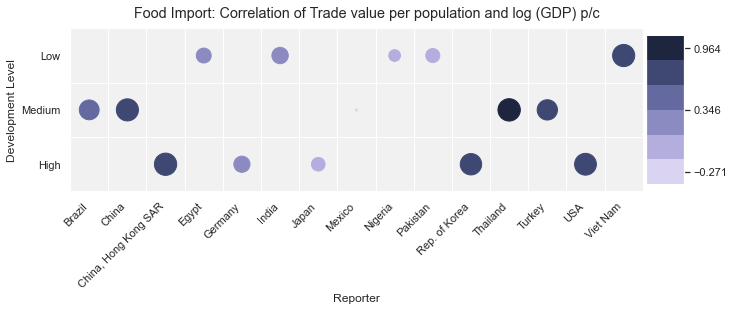

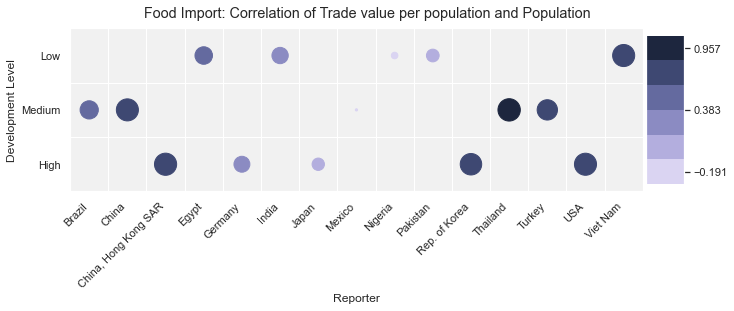

In [149]:
plot_correlation_diagram(corr_data, 'Food', 'Import',  'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Food', 'Import',  'Population')

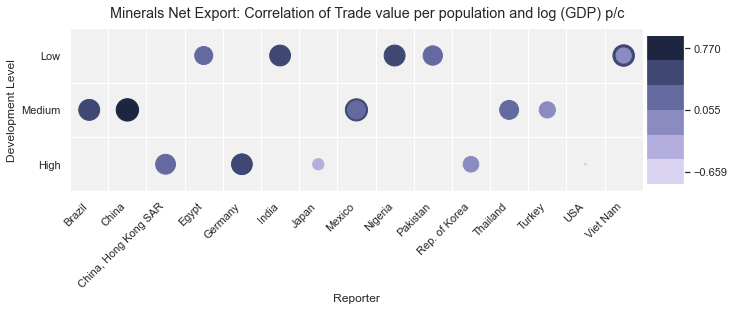

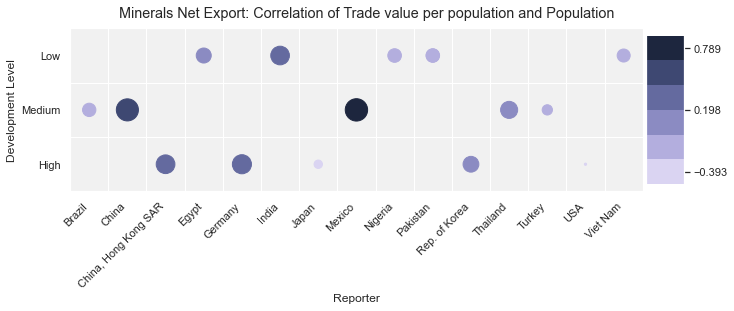

In [151]:
plot_correlation_diagram(corr_data, 'Minerals', 'Net Export', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Minerals', 'Net Export', 'Population')

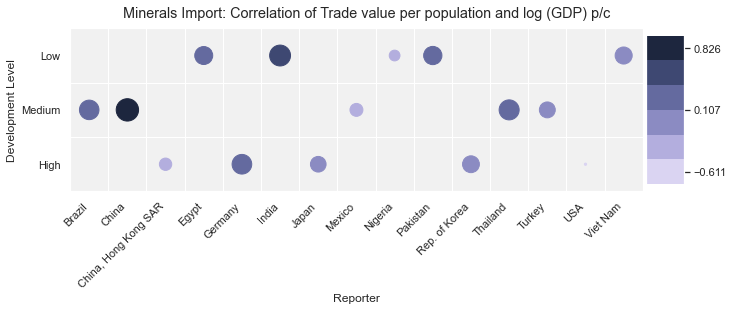

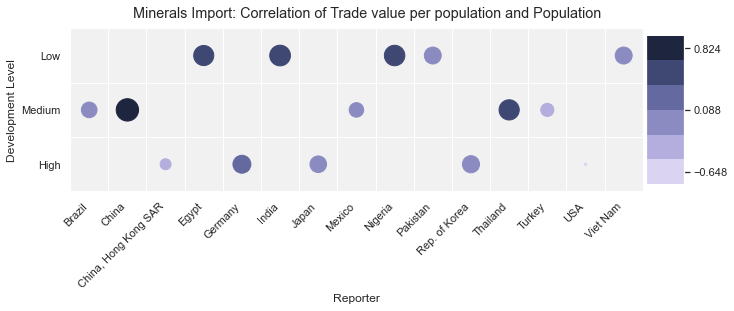

In [152]:
plot_correlation_diagram(corr_data, 'Minerals', 'Import', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Minerals', 'Import', 'Population')

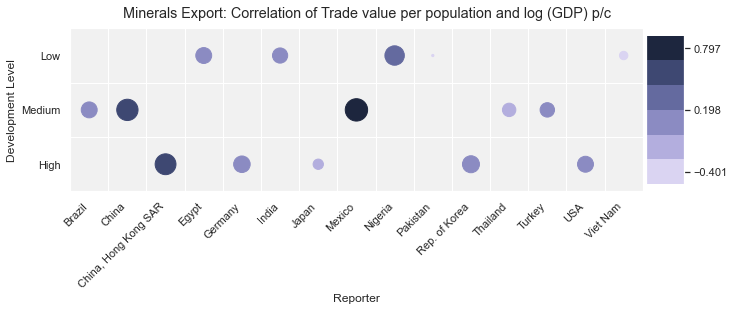

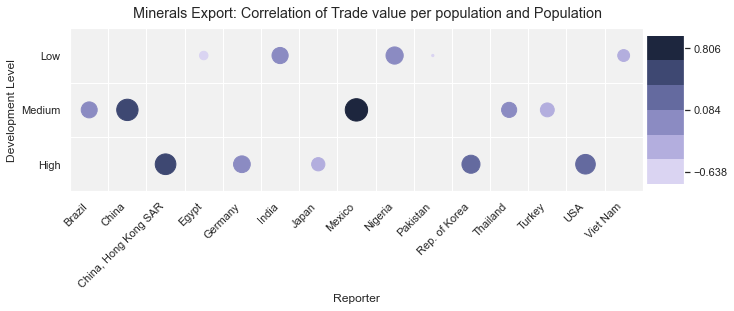

In [153]:
plot_correlation_diagram(corr_data, 'Minerals', 'Export', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Minerals', 'Export', 'Population')

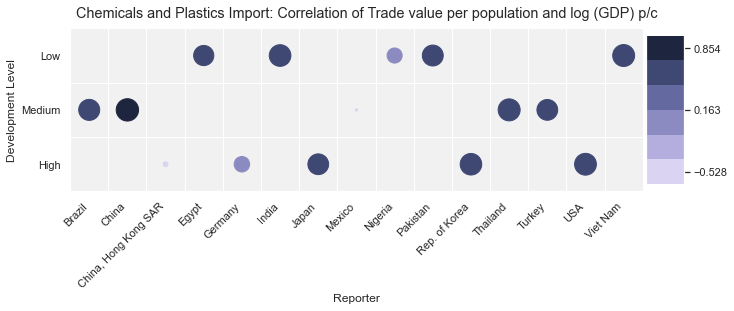

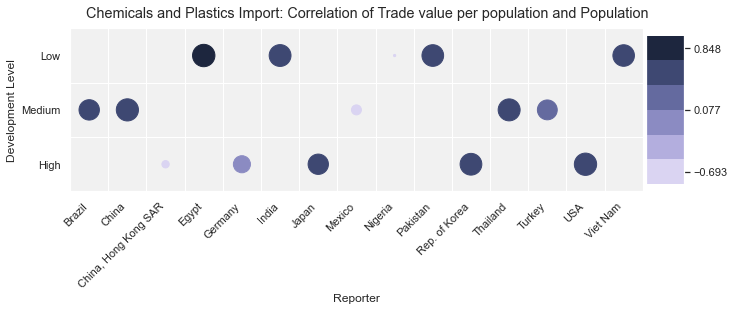

In [154]:
plot_correlation_diagram(corr_data, 'Chemicals and Plastics', 'Import', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Chemicals and Plastics', 'Import', 'Population')

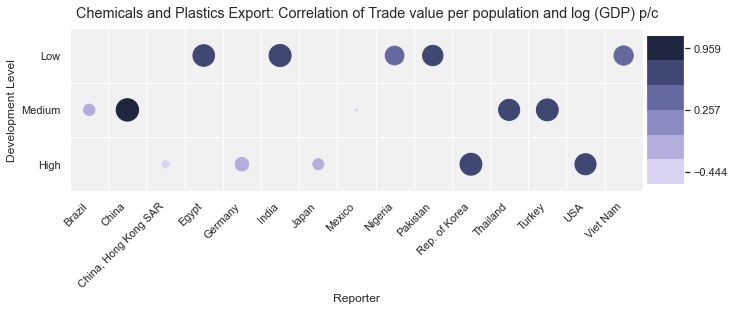

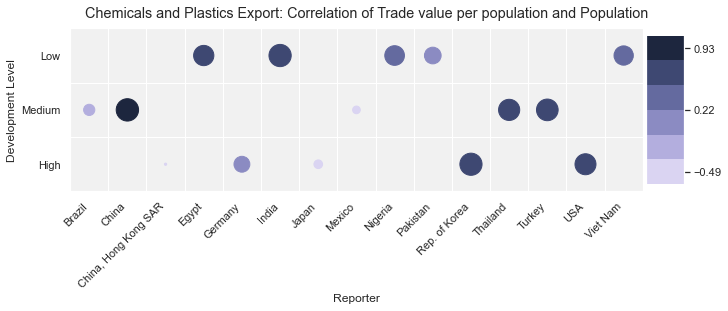

In [155]:
plot_correlation_diagram(corr_data, 'Chemicals and Plastics', 'Export', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Chemicals and Plastics', 'Export', 'Population')

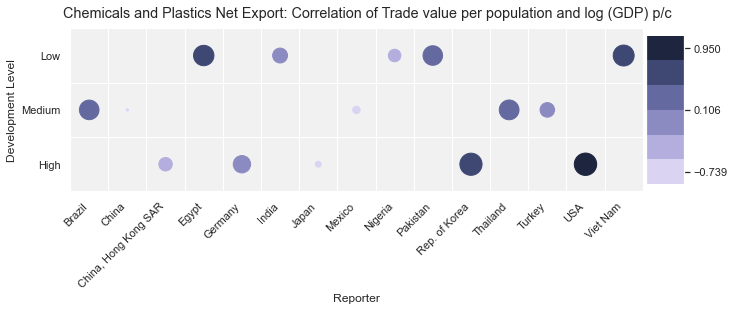

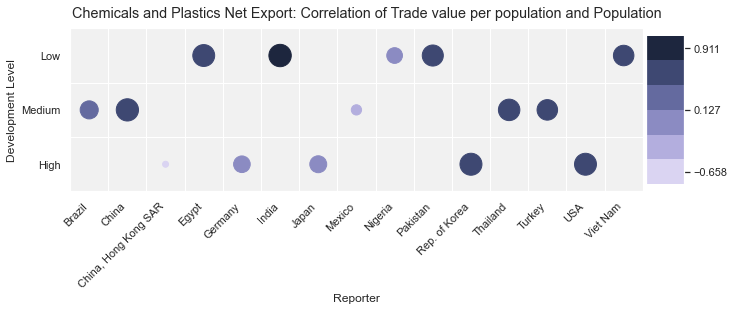

In [156]:
plot_correlation_diagram(corr_data, 'Chemicals and Plastics', 'Net Export', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Chemicals and Plastics', 'Net Export', 'Population')

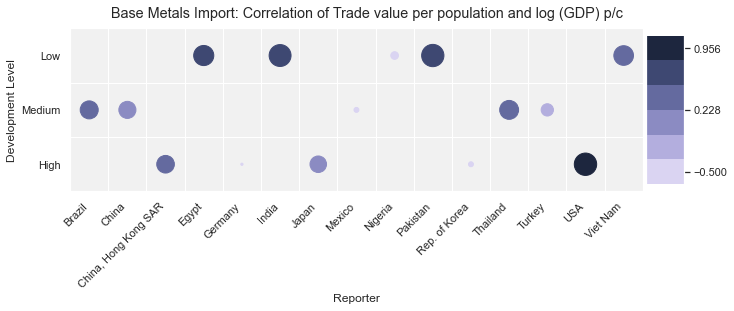

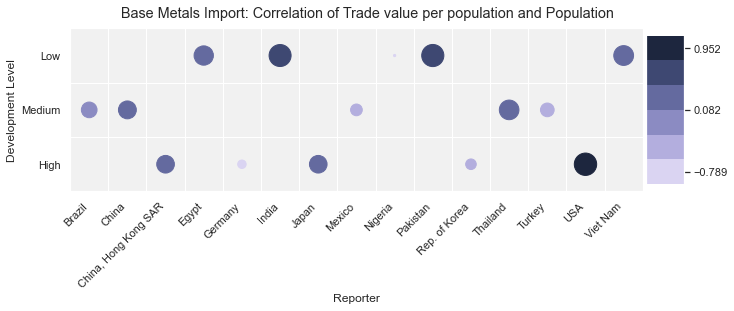

In [157]:
plot_correlation_diagram(corr_data, 'Base Metals', 'Import', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Base Metals', 'Import', 'Population')

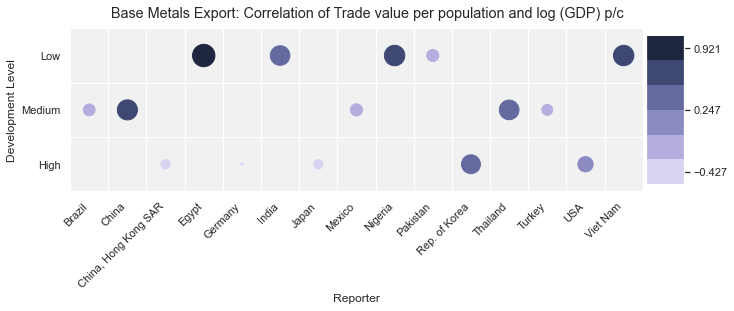

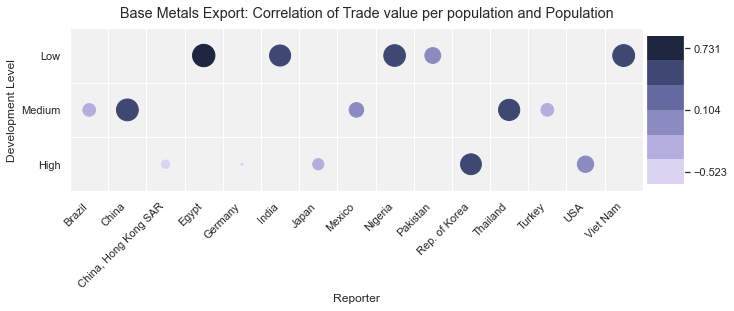

In [158]:
plot_correlation_diagram(corr_data, 'Base Metals', 'Export', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Base Metals', 'Export', 'Population')

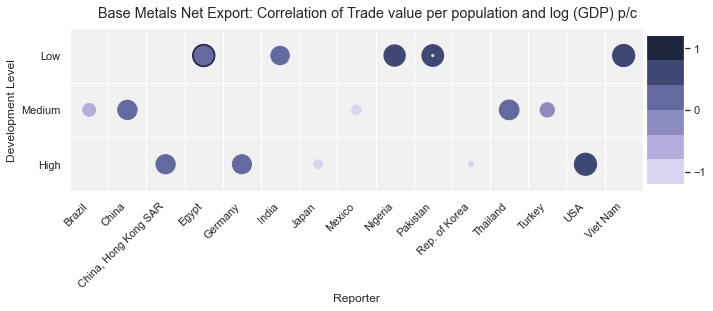

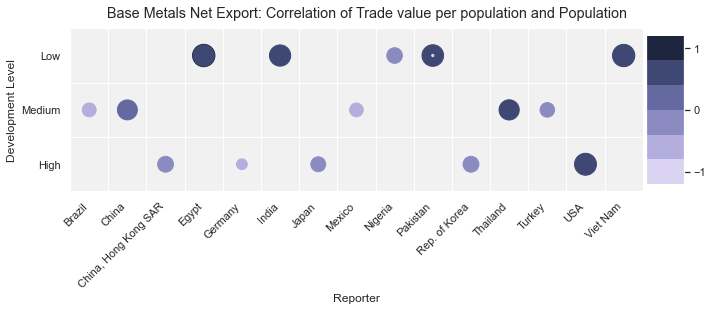

In [160]:
plot_correlation_diagram(corr_data, 'Base Metals', 'Net Export', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Base Metals', 'Net Export', 'Population')

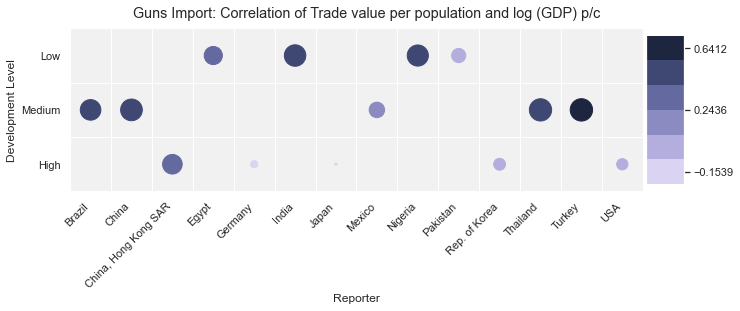

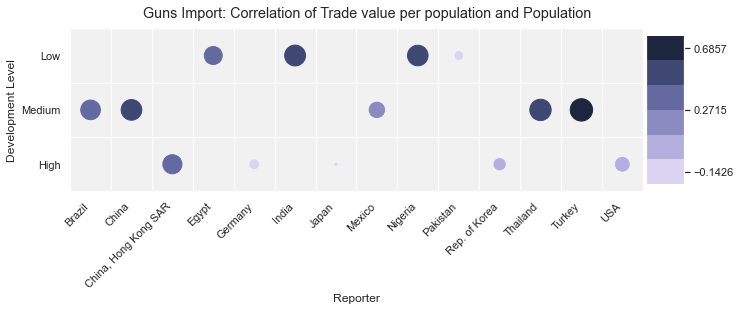

In [161]:
plot_correlation_diagram(corr_data, 'Guns', 'Import', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Guns', 'Import', 'Population')

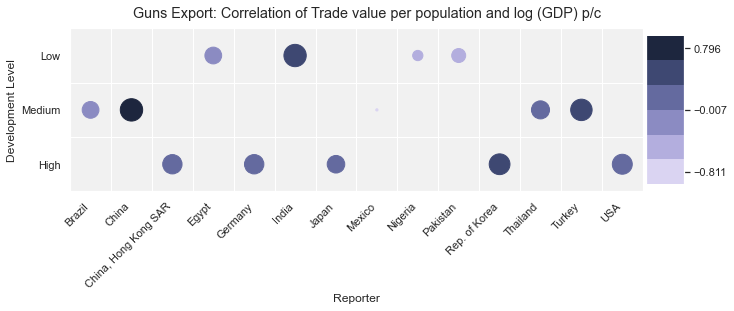

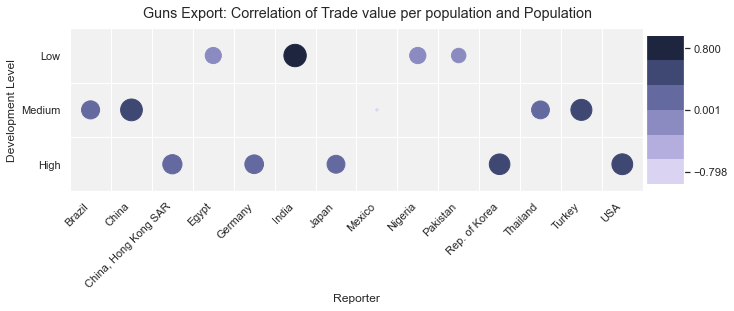

In [162]:
plot_correlation_diagram(corr_data, 'Guns', 'Export', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Guns', 'Export', 'Population')

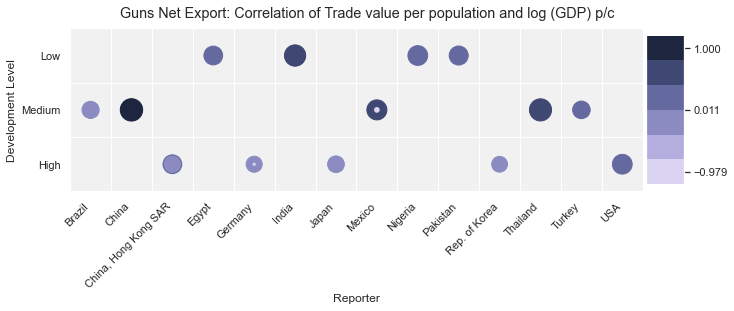

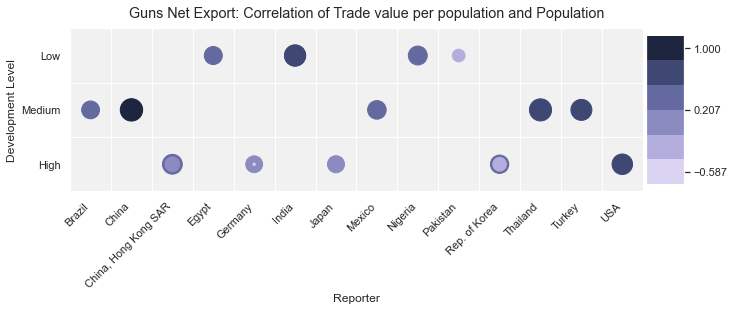

In [163]:
plot_correlation_diagram(corr_data, 'Guns', 'Net Export', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, 'Guns', 'Net Export', 'Population')

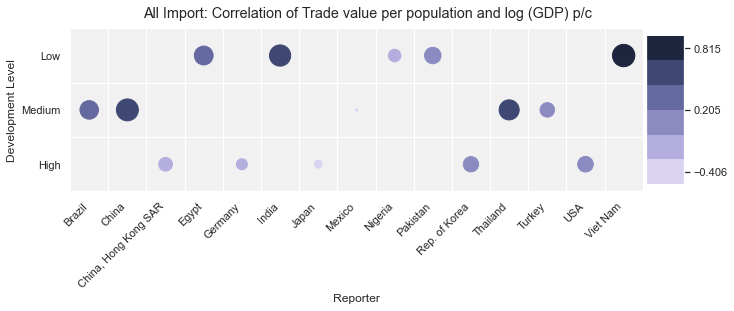

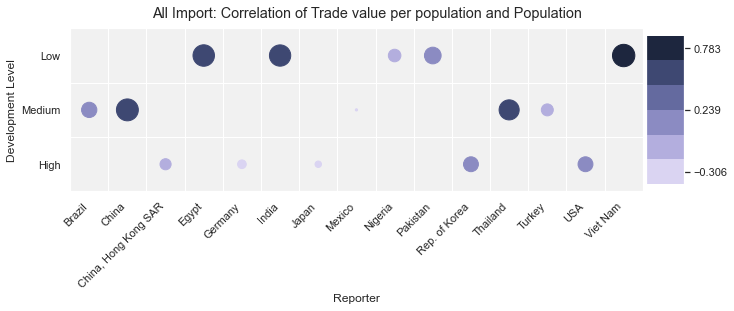

In [164]:
plot_correlation_diagram(corr_data, None, 'Import', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, None, 'Import', 'Population')

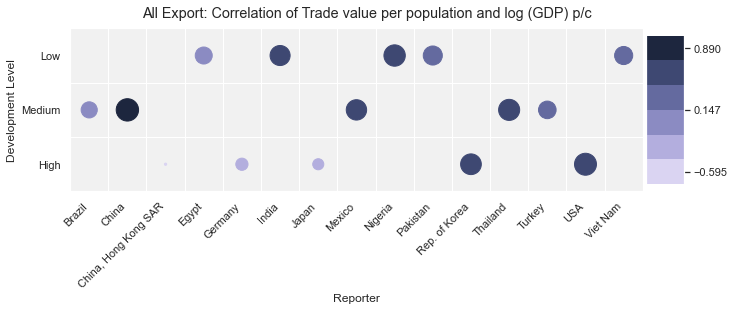

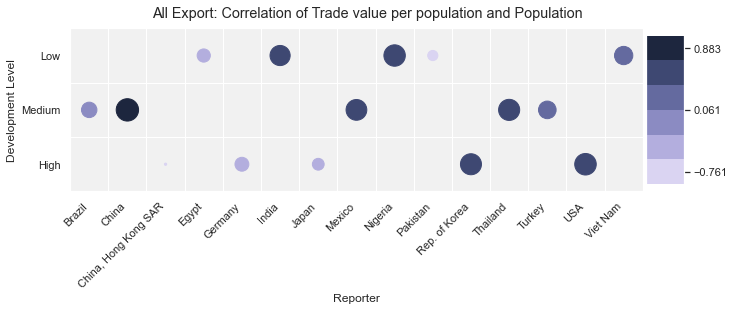

In [165]:
plot_correlation_diagram(corr_data, None, 'Export', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, None, 'Export', 'Population')

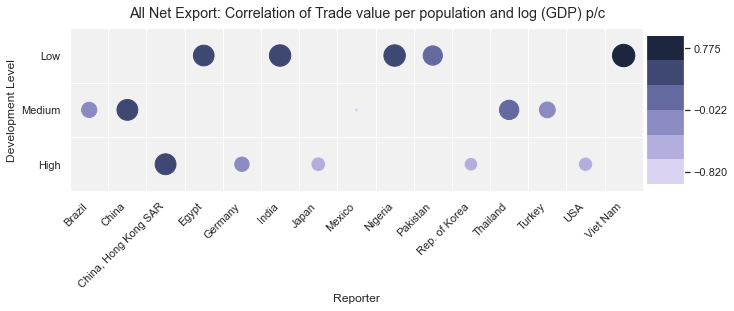

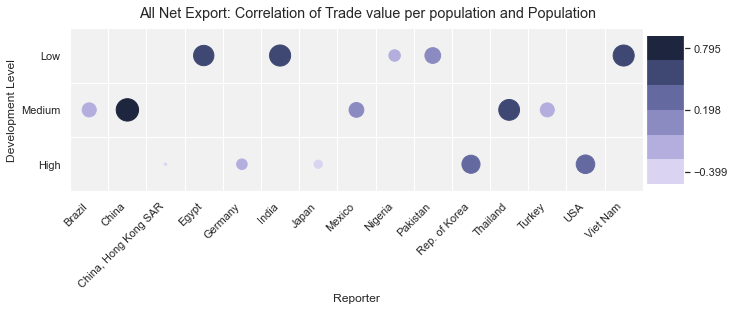

In [166]:
plot_correlation_diagram(corr_data, None, 'Net Export', 'log (GDP) p/c')
plot_correlation_diagram(corr_data, None, 'Net Export', 'Population')

In [31]:
#Percentage growth of Trade Value of each product type, i.e food, chemicals, minerals etc
#Ratio of trade value growth to population
import matplotlib.ticker as mticker
def annual_product_flow_comp(df_agg, flow, product_type, other_column):
    global correlation_df_grouped
    global correlation_df_single
    cat_dict = {'High':cat_1, 'Medium':cat_2, 'Low':cat_3}
    for key, values in cat_dict.items():
        count = 0
        fig = plt.figure(figsize=(10,8))
        spec2 = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
        fig.tight_layout();
        fig.subplots_adjust(hspace=1.1, wspace=0.5, top=0.9);
        trade_flow = f'{flow}_growth'
        data = get_flow_data_with_product(df_agg, flow, key, product_type)
        data_trade = calculate_percent(data, 'Trade Value (US$)').rename(columns={'Trade Value (US$)': trade_flow})
        other_column_growth = f'{other_column}_Growth'
        other_data = calculate_percent(data, other_column).rename(columns={other_column: other_column_growth})
        main_data = other_data[['Year', 'Reporter', other_column_growth]]
        main_data[trade_flow] = data_trade[trade_flow]
        
        min_y = main_data[trade_flow].min()
        max_y = main_data[trade_flow].max() + 1
        min_y2 = main_data[other_column_growth].min()
        max_y2 = main_data[other_column_growth].max() + 1
        if(key == 'Low' and product_type =='Guns'):
            main_data = main_data[~(main_data['Reporter'] == 'Viet Nam')]
            count_len=4
            rows=2
        else:
            count_len=5
            rows=3
        for a in range(rows):
            for b in range(2):
                if count != count_len:
                    cat = values[count]
                    dt = main_data[main_data['Reporter'] ==cat]
                    
                    y = dt[trade_flow]
                    x = dt["Year"]
                    ax = fig.add_subplot(spec2[a,b]);
                    sns.lineplot(ax=ax, x=x, y=y, data=dt, marker=5, ci = None, color='tab:blue');
                    ax.set(ylim=(min_y, max_y))
                    ax.set_ylabel(f'{flow} Growth', color='tab:blue');
                    ax.set_xlabel('Year');
                    ticks_loc = pd.DatetimeIndex(dt['Year'].unique()).year.tolist()
                    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
                    ax.set_xticklabels(ticks_loc);
                    ax.set_title(cat);
                    ax2 = ax.twinx()
                    y = dt[other_column_growth]
                    sns.lineplot(x=x, y=y, data=dt, marker=5, ci = None, color='tab:red', markerfacecolor='red');
                    ax2.set(ylim=(min_y2, max_y2))
                    ax2.set_ylabel(f'{other_column} Growth', color='tab:red')
                    count = count +1
        
        fig.suptitle(f"% Annual {product_type} {flow} vs {other_column} Growth ({key} Income)", fontsize=16);
        



In [32]:
#Percentage growth of Trade Value of each product type, i.e food, chemicals, minerals etc
#Ratio of trade value growth to population
import matplotlib.ticker as mticker
def get_lineplot_for_reporter(df_agg, flow, product_type, corr_metric, reporterIso):
    plt.figure(figsize=(10,7))
    trade_flow = f'{flow}_growth'
    df_agg = df_agg[df_agg['Reporter ISO']==reporterIso]
    development = df_agg['Development Level'].head(1).values[0]
    data = get_flow_data_with_product(df_agg, flow, None, product_type)
    
    data_trade = calculate_percent(data, 'Trade Value (US$)').rename(columns={'Trade Value (US$)': trade_flow})
    corr_metric_growth = f'{corr_metric}_Growth'
    corr_metric_data = calculate_percent(data, corr_metric).rename(columns={corr_metric: corr_metric_growth})
    dt = corr_metric_data[['Year', 'Reporter', corr_metric_growth]]
    dt[trade_flow] = data_trade[trade_flow]
    if(development == 'Low' and product_type =='Guns'):
            dt = dt[~(dt['Reporter'] == 'Viet Nam')]
    y = dt[trade_flow]
    x = dt["Year"]
    ax = sns.lineplot(x=x, y=y, data=dt, marker=5, ci = None, color='tab:blue');
    ax.set_ylabel(f'{flow} Growth', color='tab:blue');
    ax.set_xlabel('Year');
    ticks_loc = pd.DatetimeIndex(dt['Year'].unique()).year.tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
    ax.set_xticklabels(ticks_loc);
    
    ax2 = ax.twinx()
    y = dt[corr_metric_growth]
    corr_metric_title = corr_metric.replace('_', ' ')
    sns.lineplot(x=x, y=y, data=dt, marker=5, ci = None, color='tab:red', markerfacecolor='red');
    ax2.set_ylabel(f'{corr_metric_title} Growth', color='tab:red')          
                    
                    
                    
                    
    plt.title(f"% Annual {product_type} {flow} vs {corr_metric_title} Growth ({reporterIso})", fontsize=16);
        



In [33]:
def get_net_loss_plot(df, product_type, reporterIso):
    plt.figure(figsize=(10,7))
    df= df[df['Reporter ISO']==reporterIso]
    development_level = df['Development Level'].head(1).values[0]
    #product wise only for development level
    df_g = get_flow_data_with_product(df, None, development_level, product_type)
    df_g.loc[(df_g['Trade Flow'] =='Import', 'Trade Value (US$)')] *= -1
    dt = (df_g.groupby(['Year', 'Reporter']).agg(Net_Export=("Trade Value (US$)", "sum"),GDP_per_capita=(gdpColumnName, "last"))).reset_index()
    if(development_level == 'Low' and product_type=='Guns'):
        dt = dt[~(dt['Reporter'] == 'Viet Nam')]
    if (product_type != None):
        title = f'of {product_type}'
    else:
        title = ''    
    x = dt["Year"]
    y = dt["Net_Export"]
    ax = sns.barplot(x=x, y=y, data=dt, color='tab:blue'); 
    ax.set_xticklabels(pd.DatetimeIndex(dt['Year'].unique()).year);
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(utils.human_format));
    plt.xticks(rotation=90);
    ax.set_xlabel('Year');
    ax.set_ylabel(f'Net Export', color='tab:blue');
    ax2 = ax.twinx()
    y = dt["GDP_per_capita"]
    sns.lineplot(data=dt, y=y,x=ax.get_xticks(), marker='o', ci = None,sort = False, color='tab:red');
    ax2.set_ylabel(f'GDP per capita', color='tab:red')
    plt.title(f"Annual Net Export {title} vs. Recorded GDP per capita ({reporterIso})", fontsize=15);
    


In [34]:
#get_lineplot_for_reporter(df_agg=data_all_cats.copy(), flow='Import', product_type='Minerals', corr_metric=gdpColumnName, reporterIso='USA')

In [35]:
#get_net_loss_plot(df=data_all_cats.copy(), product_type='Minerals', reporterIso='USA')

## Food vs Population
* The higher the development index of the country the higher the correlation between population growth and food import. Generally, there is a positive linear correlation. High income countries have the most positively linear correlated growth between food import and population at 0.79. Low income countries have a weak linear correlation between both
## Food vs GDP
* Albeit weak correlation between gdp and food import. 
 

## Minerals vs Population
* High Income Countries have a negative correlation, Middle Income almost no correlation, while low income countries have a positively weak correlation between minerals import and population
* Low income countries have a negative correlation, While other country categories have a positively weak linear correlation between population growth and minerals export

## Minerals vs GDP
* Middle income countries have a very positive correlation between minerals import and the gdp growth. While there is no linear correlation amongst other country categories.
* No correlation between minerals export growth and gdp growth

## Guns vs Population
* Strong positive correlation between gun import and population growth in low income countries, weak amongst other catgeories
* Strong positive correlation between gun export growth and population growth in low income countries. Negative correlation amongst middle income and no correlation among high income
## Guns vs GDP
* The more the gdp grows among middle income and high income, the less gun they import and export (Negative correlation).
* No correlation for export in low income countries

## Chemicals and Plastics vs Population
## Chemicals and Plastics vs GDP

## Base Metals vs Population
## Base Metals vs GDP

# Cummulative approach (Countries Imports/Exports growth vs Population and GDP)

In [36]:
def annual_comp_per_cat(df_agg, flow, metric_1, metric_2):
    cat_dict = {'High':cat_1, 'Medium':cat_2, 'Low':cat_3}
    for key, values in cat_dict.items():
        data = get_flow_data(df_agg, flow, key)
        trade_growth = f'{flow} p.P growth'
        data_trade = calculate_percent(data, metric_1).rename(columns={metric_1: trade_growth})
        data_trade = data_trade.groupby(['Year']).mean().reset_index()
        metric_2_growth = f'{metric_2}_growth'
        main_data = calculate_percent(data, metric_2).rename(columns={metric_2: metric_2_growth})
        main_data = main_data.groupby(['Year']).mean().reset_index()
        data1=go.Scatter(x=data_trade['Year'], y=data_trade[trade_growth],name=f"{flow} p.P Growth",mode="lines + markers")
        title_metric_2 = metric_2.replace('_', ' ')
        data2=go.Scatter(x=main_data['Year'],y=main_data[metric_2_growth], name=f"{title_metric_2} Growth", mode="lines + markers" ) 
        mydata = [data1, data2]
        mylayout = go.Layout( title=f"% Annual {flow} vs. {metric_2} growth ({key} developed)")
        fig = go.Figure(data=mydata, layout=mylayout)
        fig['data'][0]['marker']['symbol'] = 'arrow-right'
        fig['data'][1]['marker']['symbol'] = 'arrow-right'
        fig.update_layout(yaxis = dict(tickmode = 'linear',  tick0=1, dtick=1), xaxis = dict(tickmode = 'array', tickvals=[2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], ticktext=["2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]))
        fig.show()
        #py.iplot(fig, filename = f'{flow}_vs_{comp_value_label}_{key}')
        #py.plot(fig, filename = f'Year_change_all_{key}', auto_open=True)


## GDP vs Import Trade Value
* Weak linear correlation between import of products and GDP of countries
## Population vs Import Trade Value
* Generally a high correlation between import and population for all country categories. The lower the development level of a country, the higher the correlation between import of products and their population

In [37]:
annual_comp_per_cat(data_all_cats.copy(), 'Import',norm_trade_col,  norm_gdp_col)

* https://plotly.com/~idaShobs/71/
* https://plotly.com/~idaShobs/69/
* https://plotly.com/~idaShobs/67/

## GDP vs Export
* A surprising negative linear correlation between export and GDP of low income countries. Meaning the more their GDP grows the less they generally export. This is surprising and interesting phenomenon
* Weak linear correlation between the export and GDP among high and middle income countries.
## Population vs Export
* Positive linear correlation between export of products and population for middle income. This could be because of China high export trade value, and high population that almost eclipses the other countries

* https://plotly.com/~idaShobs/83/
* https://plotly.com/~idaShobs/81/
* https://plotly.com/~idaShobs/79/

* https://plotly.com/~idaShobs/89/
* https://plotly.com/~idaShobs/87/
* https://plotly.com/~idaShobs/85/

# Yearly net export of each country per product
When a country exports goods, it sells them to a foreign market, that is, to consumers, businesses, or governments in another country. Those exports bring money into the country, which increases the exporting nation's GDP. When a country imports goods, it buys them from foreign producers. The money spent on imports leaves the economy, and that decreases the importing nation's GDP.
If net exports are positive, the nation has a positive balance of trade. If they are negative, the nation has a negative trade balance. Virtually every nation in the world wants its economy to be bigger rather than smaller. That means that no nation wants a negative trade balance.
EconoTalk

Protectionism refers to government policies designed to restrict imports from coming into the nation. A tariff, also called a duty, is a tax on imports as they come into the country. Free trade means international trade that is unrestricted by tariffs or other forms of protectionism.

Because no nation wants a negative trade balance, some countries try to protect their own markets. This policy, called (logically enough) protectionism, uses barriers to keep out imports. These barriers include high tariffs—taxes or surcharges on imported goods—and strict rules about what products can be imported.
source: https://www.infoplease.com/business/economy/gdp-and-players-three-imports-and-exports



In [49]:
def get_net_loss(df, development_level, product):
    global correlation_df_grouped
    global correlation_df_single
    #product wise only for development level
    df_g = get_flow_data_with_product(df, None, development_level, product)
    df_g.loc[(df_g['Trade Flow'] =='Import', 'Trade Value (US$)')] *= -1
    df_agg = (df_g.groupby(['Year', 'Reporter']).agg(Net_Export=("Trade Value (US$)", "sum"),GDP_per_capita=(gdpColumnName, "last"))).reset_index()
    if(development_level == 'Low' and product=='Guns'):
        df_agg = df_agg[~(df_agg['Reporter'] == 'Viet Nam')]
        count_len=4
        rows=2
    else:
        count_len=5
        rows=3
    #df_agg['Percent_Net_Export'] = calculate_percent(df_agg, 'Net_Export')['Net_Export']
    if(product == None):
        product_Type = 'All'
    else:
        product_Type = product
    correlation_df_grouped = correlation_df_grouped.append({'Flow':'Both', 'Product_Type':product_Type, 'Development':development_level, 'Corr_x':'Net_Export', 'Corr_y':'GDP_per_capita', 'Corr':df_agg['Net_Export'].corr(df_agg['GDP_per_capita'])}, ignore_index=True)
  
    fig = plt.figure(figsize=(10,8))
    spec2 = gridspec.GridSpec(ncols=2, nrows=3, figure=fig)
    fig.tight_layout();
    fig.subplots_adjust(hspace=1.1, wspace=0.5, top=0.9);
    categories = df_agg['Reporter'].unique().tolist()
    count = 0
    min_y1  = df_agg["Net_Export"].min() 
    max_y1  = df_agg["Net_Export"].max() + 1
    min_y2 = df_agg["GDP_per_capita"].min() 
    max_y2 = df_agg["GDP_per_capita"].max()  +1
    if (product != None):
        title = f'of {product}'
    else:
        title = ''    
    for a in range(rows):
        for b in range(2):
            if count != count_len:
                cat = categories[count]
                dt = df_agg[df_agg['Reporter'] ==cat]
                correlation_df_single = correlation_df_single.append({'Reporter':cat, 'Flow':'Both', 'Product_Type':product_Type, 'Development':development_level, 'Corr_x':'Net_Export', 'Corr_y':'GDP_per_capita', 'Corr':dt['Net_Export'].corr(dt['GDP_per_capita'])}, ignore_index=True)
                x = dt["Year"]
                y = dt["Net_Export"]
                ax = fig.add_subplot(spec2[a,b])
                ax = sns.barplot(ax=ax, x=x, y=y, data=dt, color='tab:blue');
            #ax.legend(loc="upper left", bbox_to_anchor=(1,1));
                ax.set_xticklabels(pd.DatetimeIndex(dt['Year'].unique()).year);
                ax.yaxis.set_major_formatter(ticker.FuncFormatter(utils.human_format));
                plt.xticks(rotation=90);
                ax.set_xlabel('Year');
                ax.set_ylabel(f'Net Export', color='tab:blue');
                #ax.set(ylim=(min_y1, max_y1))
                ax.set_title(cat);
                ax2 = ax.twinx()
                y = dt["GDP_per_capita"]
                sns.lineplot(data=dt, y=y,x=ax.get_xticks(), marker='o', ci = None,sort = False, color='tab:red');
                #ax2.set(ylim=(min_y2, max_y2))
                ax2.set_ylabel(f'GDP per capita', color='tab:red')
                count = count +1
    
    fig.suptitle(f"Annual Net Export {title} vs. Recorded GDP per capita ({development_level} income)", fontsize=15);
    


* All negative net export of minerals in High income countries 
* In general, there is a positively correlation between GDP growth in high income countries and net export. USA has the highest net export correlation for minerals and their GDP growth 

* Generally there's a negative linear correlation of net export of Minerals and their GDP growth. Only China is an exception. They show a positively linear and strong correlation between mineral export and their GDP growth
* Mexico and Brazil annually have a positive mineral net export value

* Generally, there is a negative linear correlation between minerals net export and low income countries GDP growth. Nigeria followed by India, show a positive linear correlation.
* Nigeria is the only country to annually have a positive minerals net export and has the highest Minerals Net export amongst all countries in all categories

* USA has the highest Gun Net Export amongst the high income countries
* Only USA and Hong Kong have a positive linear correlation of their gun net export vs. their GDP growth

* Generally a weak correlation between the net export of Guns and GDP growth in medium income countries

* Viet Nam shows a positive linear correlation but this is due to missing GDP values year. This data is misleading
* India has an annually positive Gun net export. They gained more in 2015 than they loss in gun Trade.

* Low income countries are annually at a loss. They import more than they do export. Only Nigeria has an annual profit, with 2012 been the highest. This is due to their heavy Minerals trade (Petroleum). Their trade however declined heavily after the year 2014

* No Medium income country made a profit from their trade of the 5 product categories between the year 2007 and 2019. The trade of these products did not contribute to their GDP growth. This we can also observe through, the -0.03 correlation value of their GDP growth and Net export.

* No High income country made a profit from their trade of the 5 product categories between the year 2007 and 2019. The trade of these products did not contribute to their GDP growth. This we can also observe through, the -0.05 correlation value of their GDP growth and Net export.

In [150]:
correlation_df_grouped = correlation_df_grouped.sort_values(by=['Development', 'Product_Type'])
correlation_df_single = correlation_df_single.sort_values(by=['Reporter', 'Development', 'Product_Type'])

correlation_df_grouped.reset_index(drop=True, inplace=True)
correlation_df_single.reset_index(drop=True, inplace=True)


In [60]:
from tabulate import tabulate as tb

In [61]:
def as_simple_text_file(positive_data, negative_data, high_pos_corr_data, medium_pos_corr_data, low_pos_corr_data, high_negative_corr_data, medium_negative_corr_data, low_negative_corr_data, Flow):
    with open("Corr_results.txt", "a") as text_file:
        print(f'--------------------{Flow.upper()}--------------------------', file=text_file)
        try:
            csv = positive_data.nlargest(2, 'Corr').to_csv(sep='\t',  index=None)
            print(f'Most positively correlated:\n{csv}\n', file=text_file)
        except ValueError:
            print("No Positive correlation\n", file=text_file)
        try:
            csv = positive_data.nsmallest(2, 'Corr').to_csv(sep='\t',  index=None)
            print(f'Most negatively correlated:\n{csv}\n', file=text_file)
        except ValueError:
            print('No negative correlation\n', file=text_file)
        try:
            print(f'Most positively correlated in high income countries: \n{high_pos_corr_data.iloc[high_pos_corr_data.Corr.argmax()]}\n', file=text_file)
        except ValueError:
            print("No Positive correlation in high income countries\n", file=text_file) 
        try:
            print(f'Most negatively correlated in high income countries: \n{high_negative_corr_data.iloc[high_negative_corr_data.Corr.argmin()]}\n', file=text_file)
        except ValueError:
            print('No negative correlation in high income countries\n', file=text_file)
        try:
            print(f'Most positively correlated in medium income countries: \n{medium_pos_corr_data.iloc[medium_pos_corr_data.Corr.argmax()]}\n', file=text_file)
        except ValueError:
            print("No Positive correlation in medium income countries\n", file=text_file)
        try:
            print(f'Most negatively correlated in medium income countries: \n{medium_negative_corr_data.iloc[medium_negative_corr_data.Corr.argmin()]}\n', file=text_file)
        except ValueError:
            print('No negative correlation in medium income countries\n', file=text_file)
        try:
            print(f'Most positively correlated in low income countries: \n{low_pos_corr_data.iloc[low_pos_corr_data.Corr.argmax()]}\n', file=text_file)
        except ValueError:
            print("No Positive correlation in low income countries\n", file=text_file) 
        try:
            print(f'Most negatively correlated in low income countries: \n{low_negative_corr_data.iloc[low_negative_corr_data.Corr.argmin()]}\n', file=text_file)
        except ValueError:
            print('No negative correlation in low income countries\n', file=text_file)
        print("Output written to Corr_results.txt") 


In [62]:
def as_wiki_text_file(df, positive_data, negative_data, high_pos_corr_data, medium_pos_corr_data, low_pos_corr_data, high_negative_corr_data, medium_negative_corr_data, low_negative_corr_data, Flow,with_reporter=False):
    df = df.rename(columns={'Product_Type':'Product', 'Corr_x':'Value 1', 'Corr_y':'Value 2', 'Corr': 'Correlation'})
    if(with_reporter):
        header= ['Reporter','Product', 'Development', 'Value 1', 'Value 2', 'Correlation']
    else:
        header= ['Reporter','Product', 'Development', 'Value 1', 'Value 2', 'Correlation']
    df = df[header]
    
    if(Flow =='Both'):
        Flow = 'Import/Export'
    with open("Corr_as_wiki.txt", "a") as text_file:
        print(f'--------------------{Flow.upper()}--------------------------', file=text_file)
        try:
            csv = positive_data.nlargest(2, 'Corr')
            print(f' Most positively correlated {Flow}\n{tb(csv, showindex=False, tablefmt="mediawiki", headers=header)}', file=text_file)
        except ValueError:
            print("No Positive correlation\n", file=text_file)
        try:
            csv = positive_data.nsmallest(2, 'Corr')
            print(f'Most negatively correlated {Flow}\n{tb(csv, showindex=False, tablefmt="mediawiki", headers=header)}', file=text_file)
        except ValueError:
            print('No negative correlation\n', file=text_file)
        try:
            csv = high_pos_corr_data.nlargest(2, 'Corr')
            print(f'Most positively correlated {Flow} in high income countries:\n{tb(csv, showindex=False, tablefmt="mediawiki", headers=header)}', file=text_file)
        except ValueError:
            print("No Positive correlation in high income countries\n", file=text_file) 
        try:
            csv = high_negative_corr_data.nsmallest(2, 'Corr')
            print(f'Most negatively correlated {Flow} in high income countries: \n{tb(csv, showindex=False, tablefmt="mediawiki", headers=header)}', file=text_file)
        except ValueError:
            print('No negative correlation in high income countries\n', file=text_file)
        try:
            csv = medium_pos_corr_data.nlargest(2, 'Corr')
            print(f'Most positively correlated {Flow} in medium income countries: \n{tb(csv, showindex=False, tablefmt="mediawiki", headers=header)}', file=text_file)
        except ValueError:
            print("No Positive correlation in medium income countries\n", file=text_file) 
        try:
            csv = medium_negative_corr_data.nsmallest(2, 'Corr')
            print(f'Most negatively correlated {Flow} in medium income countries: \n{tb(csv, showindex=False, tablefmt="mediawiki", headers=header)}', file=text_file)
        except ValueError:
            print('No negative correlation in medium income countries\n', file=text_file)
        try:
            csv = low_pos_corr_data.nlargest(2, 'Corr')
            print(f'Most positively correlated {Flow} in low income countries: \n{tb(csv, showindex=False, tablefmt="mediawiki", headers=header)}', file=text_file)
        except ValueError:
            print("No Positive correlation in low income countries\n", file=text_file) 
        try:
            csv = low_negative_corr_data.nsmallest(2, 'Corr')
            print(f'Most negatively correlated {Flow} in low income countries: \n{tb(csv, showindex=False, tablefmt="mediawiki", headers=header)}', file=text_file)
        except ValueError:
            print('No negative correlation in low income countries\n', file=text_file)
        print("Output written to Corr_as_wiki.txt")


In [63]:
def extract_correlation_info(df, Flow, with_reporter=False, all_products = False):
    corr_data = df[df.Flow==Flow]
    if(with_reporter):
        corr_data = corr_data[['Reporter','Product_Type', 'Development', 'Corr_x', 'Corr_y', 'Corr']]
    else:
        corr_data = corr_data[['Product_Type', 'Development', 'Corr_x', 'Corr_y', 'Corr']]
    positive_corr_data = corr_data[corr_data.Corr>0.4]
    negative_corr_data = corr_data[corr_data.Corr<=0.4]
    if(all_products):
        positive_data = positive_corr_data[(positive_corr_data['Product_Type']=='All')]
        negative_data = negative_corr_data[(negative_corr_data['Product_Type']=='All')]
    else:
        positive_data = positive_corr_data[~(positive_corr_data['Product_Type']=='All')]
        negative_data = negative_corr_data[~(negative_corr_data['Product_Type']=='All')]
    high_pos_corr_data = positive_data[(positive_data['Development']=='High')]
    medium_pos_corr_data = positive_data[(positive_data['Development']=='Medium')]
    low_pos_corr_data = positive_data[(positive_data['Development']=='Low')]
    high_negative_corr_data = negative_data[(negative_data['Development']=='High')]
    medium_negative_corr_data = negative_data[(negative_data['Development']=='Medium')]
    low_negative_corr_data = negative_data[(negative_data['Development']=='Low')]
    as_simple_text_file(positive_data, negative_data, high_pos_corr_data, medium_pos_corr_data, low_pos_corr_data, high_negative_corr_data, medium_negative_corr_data, low_negative_corr_data, Flow)
    as_wiki_text_file(df, positive_data, negative_data, high_pos_corr_data, medium_pos_corr_data, low_pos_corr_data, high_negative_corr_data, medium_negative_corr_data, low_negative_corr_data, Flow, with_reporter)
    

In [64]:
extract_correlation_info(correlation_df_grouped, 'Import')


Output written to Corr_results.txt
Output written to Corr_as_wiki.txt


In [65]:
extract_correlation_info(correlation_df_grouped,'Export')



Output written to Corr_results.txt
Output written to Corr_as_wiki.txt


In [66]:
extract_correlation_info(correlation_df_grouped,'Both')


Output written to Corr_results.txt
Output written to Corr_as_wiki.txt


In [67]:
extract_correlation_info(correlation_df_single,'Import',with_reporter=True)


Output written to Corr_results.txt
Output written to Corr_as_wiki.txt


In [68]:
extract_correlation_info(correlation_df_single,'Export',with_reporter=True)


Output written to Corr_results.txt
Output written to Corr_as_wiki.txt


In [69]:
extract_correlation_info(correlation_df_single,'Both',with_reporter=True)


Output written to Corr_results.txt
Output written to Corr_as_wiki.txt


In [70]:
extract_correlation_info(correlation_df_grouped,'Import', with_reporter=False, all_products=True)


Output written to Corr_results.txt
Output written to Corr_as_wiki.txt


In [71]:
extract_correlation_info(correlation_df_grouped,'Export', with_reporter=False, all_products=True)


Output written to Corr_results.txt
Output written to Corr_as_wiki.txt


In [72]:
extract_correlation_info(correlation_df_grouped,'Both', with_reporter=False, all_products=True)


Output written to Corr_results.txt
Output written to Corr_as_wiki.txt


In [73]:
extract_correlation_info(correlation_df_single,'Both', with_reporter=True, all_products=True)


Output written to Corr_results.txt
Output written to Corr_as_wiki.txt


In [152]:
cs = correlation_df_grouped[correlation_df_grouped['Product_Type']=='All']
cs = cs[cs['Flow']=='Both'].sort_values(by='Corr')
cs = cs.rename(columns={'Product_Type':'Product', 'Corr_x':'Value 1', 'Corr_y':'Value 2', 'Corr': 'Correlation'})
header = ['Development', 'Value 1', 'Value 2', 'Correlation']
cs = cs[header]
result = tb(cs, showindex=False, tablefmt="mediawiki", headers=header)
result =result.replace('_', ' ').replace('Gdp', 'GDP').replace('Growth', 'growth')
with open("wiki.txt", "w") as text_file:
    print(f'{result}', file=text_file)



In [153]:
cs = correlation_df_single[(correlation_df_single['Product_Type']=='All') ]
#cs = cs[cs['Corr_y']=='Gdp_per_capita_Growth']
#Population_Growth
#Gdp_per_capita_Growth
cs = cs[cs['Flow']=='Both'].sort_values(by='Corr').nlargest(2, 'Corr')
cs = cs.rename(columns={'Product_Type':'Product', 'Corr_x':'Value 1', 'Corr_y':'Value 2', 'Corr': 'Correlation'})
header = ['Reporter','Development', 'Value 1', 'Value 2', 'Correlation']
cs = cs[header]
result = tb(cs, showindex=False, tablefmt="mediawiki", headers=header)
result =result.replace('_', ' ').replace('Gdp', 'GDP').replace('Growth', 'growth')
with open("wiki.txt", "w") as text_file:
    print(f'{result}', file=text_file)